In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("FOE.csv")
data.drop(['Date'], axis=1)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.000000,2.722222,2.685185,2.685185,1.450476,47925
1,1980-03-18,0.000000,2.703704,2.666667,2.685185,1.450476,77625
2,1980-03-19,0.000000,2.703704,2.666667,2.703704,1.460480,35775
3,1980-03-20,0.000000,2.777778,2.703704,2.722222,1.470483,42525
4,1980-03-21,0.000000,2.777778,2.740741,2.740741,1.480487,37125
...,...,...,...,...,...,...,...
10585,2022-03-09,21.639999,21.780001,21.450001,21.780001,21.780001,820400
10586,2022-03-10,21.570000,21.799999,21.559999,21.790001,21.790001,409500
10587,2022-03-11,21.750000,21.790001,21.660000,21.780001,21.780001,538200
10588,2022-03-14,21.780001,21.780001,21.730000,21.750000,21.750000,726700


In [3]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.984536,0.983247,0.983551,0.951436,-0.062758
High,0.984536,1.000000,0.999295,0.999576,0.952573,-0.113658
Low,0.983247,0.999295,1.000000,0.999549,0.950382,-0.125574
Close,0.983551,0.999576,0.999549,1.000000,0.951864,-0.119054
Adj Close,0.951436,0.952573,0.950382,0.951864,1.000000,-0.006426
Volume,-0.062758,-0.113658,-0.125574,-0.119054,-0.006426,1.000000


Text(0.5, 1.0, 'Correlation matrix')

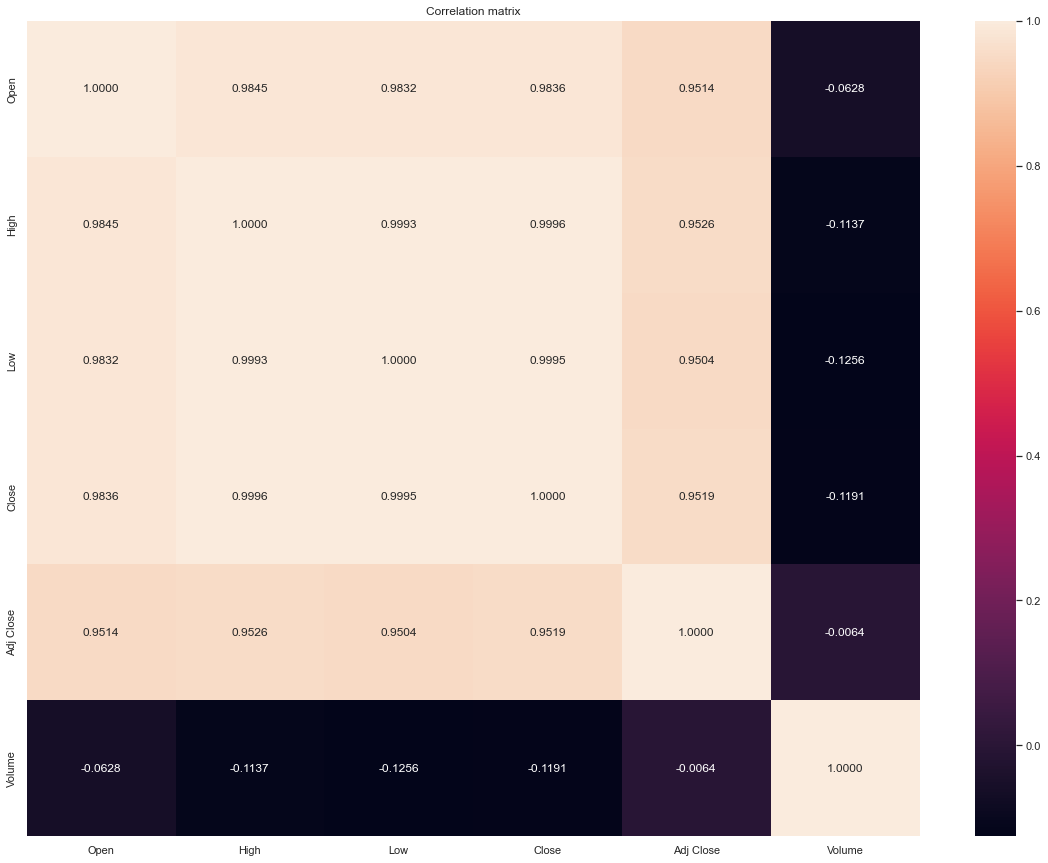

In [4]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(data.corr() , annot =True , fmt ="0.4f")
ax.set_title("Correlation matrix")

In [5]:
data.shape

(10590, 7)

In [6]:
data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
10585,False,False,False,False,False,False,False
10586,False,False,False,False,False,False,False
10587,False,False,False,False,False,False,False
10588,False,False,False,False,False,False,False


In [7]:
from sklearn.model_selection import train_test_split

inp_var = ['Open','High','Low','Close','Adj Close']
target_var = ['Volume']


X = data[inp_var].values
y = data[target_var].values
test_split_size = 0.30

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = test_split_size, random_state =42)

In [8]:
trainval = (1.0*len(X_train))/(1.0* len(data.index))
testval = (1.0*len(X_test))/(1.0* len(data.index))

print("training_set_value {0:.2f}%".format(trainval*100))
print("testing_set_value {0:.2f}%".format(testval*100))

training_set_value 70.00%
testing_set_value 30.00%


In [10]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr_model = LogisticRegression( C= 0.7 , random_state = 42)
lr_model.fit(X_train,y_train.ravel())
lr_predict = lr_model.predict(X_test)

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,lr_predict)*100))

print("Confusion Matrix")

#print(metrics.confusion_matrix(y_test,lr_predict,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,lr_predict,labels =[1,0]))

Accuracy : 0.06
Confusion Matrix
Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0



In [ ]:
#Support Vector Classification

from sklearn.svm import SVC

svm_model = SVC(kernel = "linear" ,C=1, random_state = 1)
svm_model.fit(X_train,y_train.ravel())
svm_predict = svm_model.predict(X_test)
svm_prediction = svm_model.predict(X_train)

print("Accuracy_of_trained_data : {0:0.2f}".format(metrics.accuracy_score(y_train,svm_prediction)))

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,svm_predict)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,svm_predict,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,svm_predict,labels =[1,0]))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model =DecisionTreeClassifier(random_state = 1)
dt_model.fit(X_train,y_train.ravel())
dt_model_predict = dt_model.predict(X_test)
training_set_prediction=dt_model.predict(X_train)


print("Accuracy_of_trained_data : {0:0.2f}".format(metrics.accuracy_score(y_train,training_set_prediction)))

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,dt_model_predict)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,dt_model_predict,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,dt_model_predict,labels =[1,0]))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 10, criterion ="entropy", random_state=1)
rf_model.fit(X_train,y_train.ravel())
rf_model_predict = rf_model.predict(X_test)
training_set_prediction=rf_model.predict(X_train)


print("Accuracy_of_trained_data : {0:0.2f}".format(metrics.accuracy_score(y_train,training_set_prediction)))

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,rf_model_predict)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,rf_model_predict,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,rf_model_predict,labels =[1,0]))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski' ,p=1)
kn_model.fit(X_train,y_train.ravel())
kn_model_prediction = kn_model.predict(X_test)
training_set_prediction_Accuracy = kn_model.predict(X_train)

print("Accuracy_of_trained_data : {0:0.2f}".format(metrics.accuracy_score(y_train,training_set_prediction_Accuracy)))

print("Accuracy : {0:0.2f}" .format(metrics.accuracy_score(y_test,kn_model_prediction)*100))

print("Confusion Matrix")

print(metrics.confusion_matrix(y_test,kn_model_prediction,labels =[1,0]))

print("Classification Report")

print(metrics.classification_report(y_test,kn_model_prediction,labels =[1,0]))